# Проект по машинному обучению с учителем для интернет-магазина «В один клик»  #

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов с помощью персонализированных предложений.

**Цель проекта**

В ходе работы нужно разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: 

- «снизилась», если клиент стал покупать меньше товаров;

- «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом;

- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто;

- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине;

- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Описание данных** 

- `market_file.csv` - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

`id` — номер покупателя в корпоративной базе данных.

`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».

`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.

`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.

`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.

`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.

`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- `market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

`Выручка` — сумма выручки за период.

- `market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксировано общее время.

`минут` — значение времени, проведённого на сайте, в минутах.

- `money.csv` - таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

`id` — номер покупателя в корпоративной базе данных.

`Прибыль` — значение прибыли.

**План работы**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

## Загрузка данных

Импортируем необходимые библиотеки

In [1]:
# Загрузим необходимые библиотеки
!pip install phik -q
!pip install shap -q
!pip install matplotlib==3.5.0 -q
!pip install -U scikit-learn -q

# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import phik
import os

# Для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Для Машинного обучения
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# загружаем классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler,
    #RobustScaler,
    OrdinalEncoder
)


#Метрики
from sklearn.metrics import roc_auc_score

# Для пайплайна
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Класс для работы с пропусками
from sklearn.impute import SimpleImputer



In [2]:
#Загрузим необходимые датафреймы
pth1 = '/datasets/market_file.csv'
pth1_1 = 'https://code.s3.yandex.net/datasets/market_file.csv'
pth2 = '/datasets/market_money.csv'
pth2_2 = 'https://code.s3.yandex.net/datasets/market_money.csv'
pth3 = '/datasets/market_time.csv'
pth3_3 = 'https://code.s3.yandex.net/datasets/market_time.csv'
pth4 = '/datasets/money.csv'
pth4_4 = 'https://code.s3.yandex.net/datasets/money.csv'

if os.path.exists(pth1):
    df_file = pd.read_csv(pth1)
else:
    try:  df_file = pd.read_csv(pth1_1)
    except: print('Ошибка при загрузке данных')
    
if os.path.exists(pth2):
    df_money = pd.read_csv(pth2)
else:
    try: df_money = pd.read_csv(pth2_2)
    except: print('Ошибка при загрузке данных')

if os.path.exists(pth3):
    df_time = pd.read_csv(pth3)
else:
    try: df_time = pd.read_csv(pth3_3)
    except: print('Ошибка при загрузке данных')
        
if os.path.exists(pth4):
    df_profit = pd.read_csv(pth4, sep=';')
else:
    try: df_profit = pd.read_csv(pth4_4, sep=';')
    except: print('Ошибка при загрузке данных')

In [3]:
#Выведем первые строки датафрейма df_file
df_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
#Изучим общую информацию об датафрейме df_file
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
#Выведем первые строки датафрейма df_money
df_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
#Изучим общую информацию об датафрейме df_money
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [7]:
#Выведем первые строки датафрейма df_money
df_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
#Изучим общую информацию об датафрейме df_time
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [9]:
#Выведем первые строки датафрейма df_profit
df_profit.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [10]:
#Изучим общую информацию об датафрейме df_profit
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


**Вывод:**

В датафрейме `df_file` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_money` формат столбцов верный. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_time` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_profit` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

##  Предобработка данных

In [11]:
# Приводим название столбцов к единому стилю 
df_file.columns = df_file.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')
df_money.columns = df_money.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')
df_time.columns = df_time.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')
df_profit.columns = df_profit.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')

Датафрейм `df_file`

In [12]:
df_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [13]:
# Изучим столбец 'покупательская_активность'
df_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [14]:
# Изучим столбец 'тип_сервиса'
df_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [15]:
# Уберем ошибки в типе сервиса
df_file['тип_сервиса'] = df_file['тип_сервиса'].replace(['стандартт'], 'стандарт', regex=True)
df_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [16]:
# Изучим столбец 'разрешить_сообщать'
df_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [17]:
# Изучим столбец 'рпопулярная_категория'
df_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [18]:
#Проверим наличие явных дубликатов
df_file.duplicated().sum()

0

In [19]:
#Выведем информацию о наличии пропусков
df_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

Датафрейм `df_money`

In [20]:
df_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [21]:
# Изучим столбец 'период'
df_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [22]:
#Проверим наличие явных дубликатов
df_money.duplicated().sum()

0

In [23]:
#Выведем информацию о наличии пропусков
df_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

Датафрейм `df_time`

In [24]:
df_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [25]:
# Изучим столбец 'период'
df_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [26]:
# Уберем ошибки в периоде
df_time['период'] = df_time['период'].replace(['предыдцщий_месяц'], 'предыдущий_месяц', regex=True)
df_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [27]:
#Проверим наличие явных дубликатов
df_time.duplicated().sum()

0

In [28]:
#Выведем информацию о наличии пропусков
df_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

Датафрейм `df_profit`

In [29]:
df_profit.head()

,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [30]:
# приведем значения в столбце прибыль к единоу стилю и зменим тип данных
df_profit['прибыль'] = df_profit['прибыль'].replace([','], '.', regex=True).astype('float')

In [31]:
df_profit.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [32]:
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [33]:
#Проверим наличие явных дубликатов
df_profit.duplicated().sum()

0

In [34]:
#Выведем информацию о наличии пропусков
df_profit.isna().sum()

id         0
прибыль    0
dtype: int64

**Вывод:**

Во всех датафреймах изменили названия столбцов к единому стилю. Пропуски и явные дубликаты отсутствуют.

В датафрейме `df_file` и `df_time` исправили не явные дубликаты.

В датафрейме `df_profit` приведели значения в столбце прибыль к единому стилю и зменили тип данных

## Исследовательский анализ данных

Датафрейм `df_file`

In [35]:
# Функция для построения графиков для качественных данных
def print_barh (df_column):
# Построение горизонтальной диаграммы
    ax = df_column.value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5)
)

# Добавление значений рядом со столбцами
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width}',
                    (width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')

In [36]:
# Функция для построения графиков для количественных данных
def print_hist (df, col, target, name):
    sns.set()
    f, axes = plt.subplots(1, 1, figsize=(17, 5))
    axes.set_title(name, fontsize=12)
    axes.set_ylabel('Количество пользователей', fontsize=12)
    if target != None:
        sns.histplot(df, bins=25, kde=True, ax=axes, hue=target, x=col)
    else:
        sns.histplot(df, bins=25, kde=True, ax=axes, x=col)
    plt.show();

In [37]:
df_file['маркет_актив_6_мес'].describe()

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

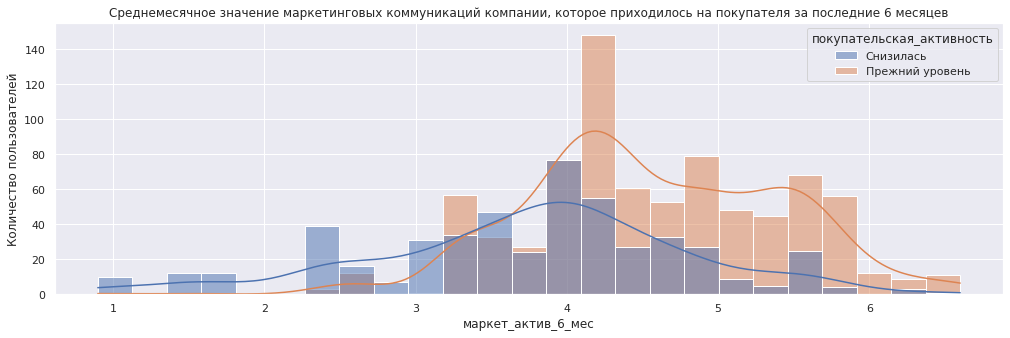

In [38]:
print_hist(df_file, 
           'маркет_актив_6_мес',
           'покупательская_активность', 
           'Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев')

In [39]:
df_file['маркет_актив_тек_мес'].describe()

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

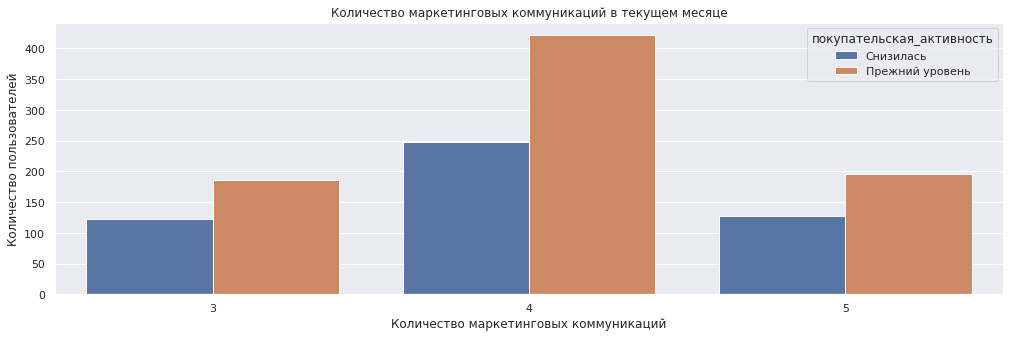

In [40]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_file,
              x = 'маркет_актив_тек_мес', 
              hue = 'покупательская_активность')
plt.title('Количество маркетинговых коммуникаций в текущем месяце')
plt.xlabel('Количество маркетинговых коммуникаций')
plt.ylabel('Количество пользователей')
plt.show;

In [41]:
df_file['длительность'].describe()

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

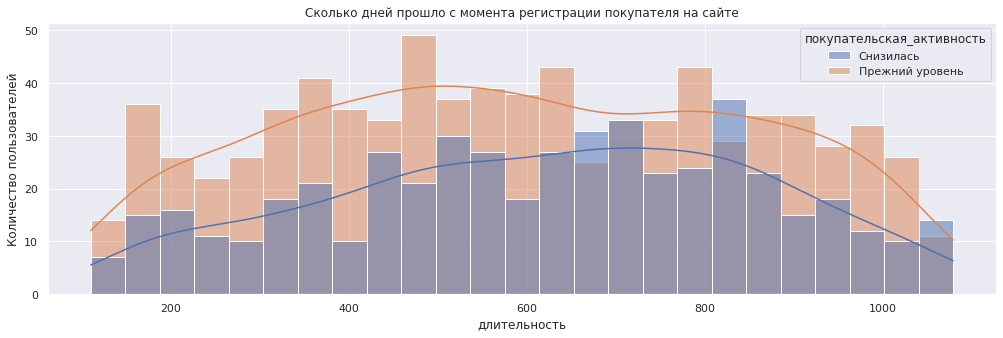

In [42]:
print_hist(df_file, 'длительность', 
           'покупательская_активность',
           'Cколько дней прошло с момента регистрации покупателя на сайте'
          )

In [43]:
df_file['акционные_покупки'].describe()

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

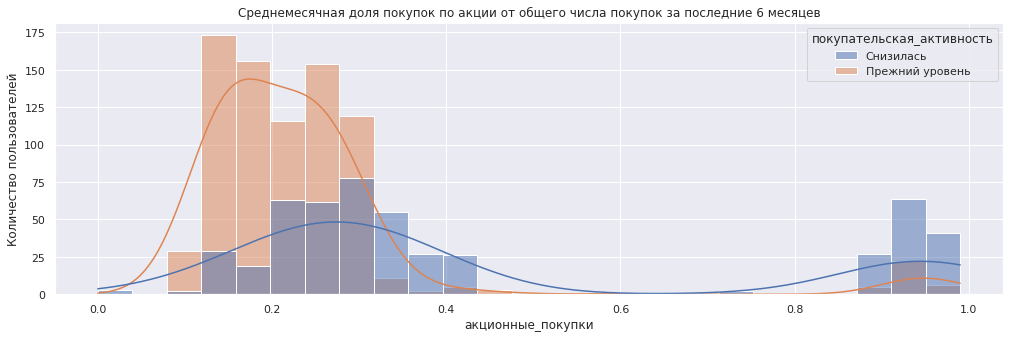

In [44]:
print_hist(df_file, 'акционные_покупки', 
           'покупательская_активность',
           'Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев'
          )

In [45]:
df_file['средний_просмотр_категорий_за_визит'].describe()

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

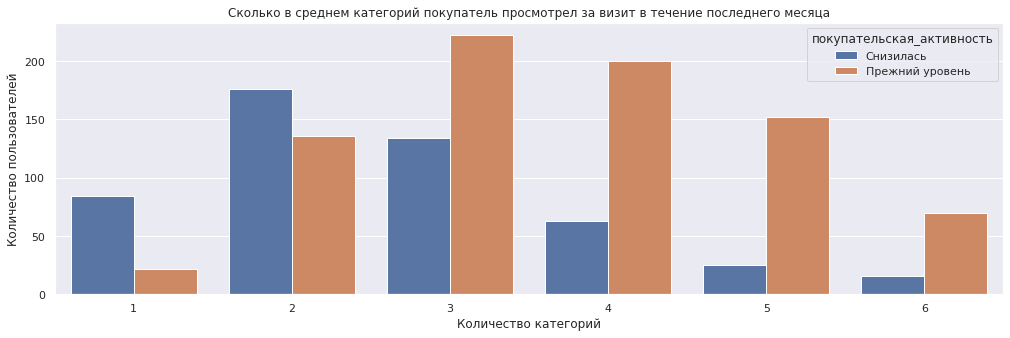

In [46]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_file,
              x = 'средний_просмотр_категорий_за_визит', 
              hue = 'покупательская_активность')
plt.title('Сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца')
plt.xlabel('Количество категорий')
plt.ylabel('Количество пользователей')
plt.show;

In [47]:
df_file['неоплаченные_продукты_штук_квартал'].describe()

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

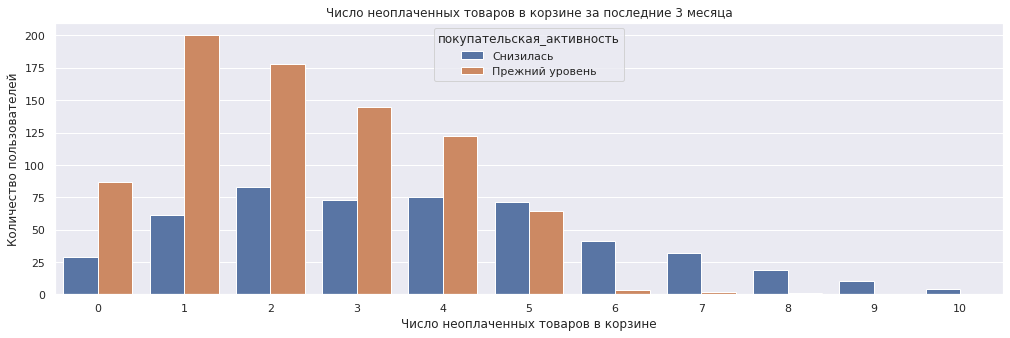

In [48]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_file,
              x = 'неоплаченные_продукты_штук_квартал', 
              hue = 'покупательская_активность')
plt.title('Число неоплаченных товаров в корзине за последние 3 месяца')
plt.xlabel('Число неоплаченных товаров в корзине')
plt.ylabel('Количество пользователей')
plt.show;

In [49]:
df_file['ошибка_сервиса'].describe()

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

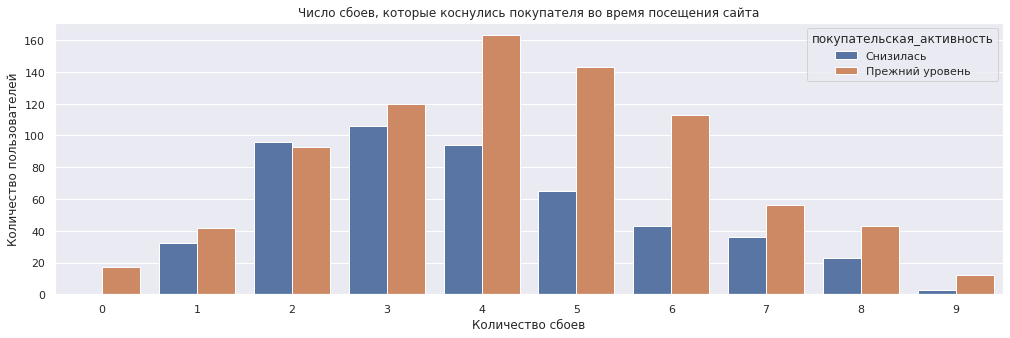

In [50]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_file,
              x = 'ошибка_сервиса', 
              hue = 'покупательская_активность')
plt.title('Число сбоев, которые коснулись покупателя во время посещения сайта')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество пользователей')
plt.show;

In [51]:
df_file['страниц_за_визит'].describe()

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

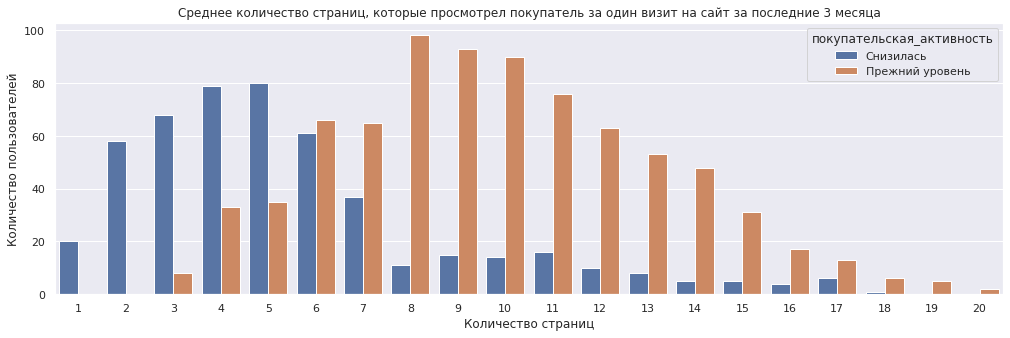

In [52]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_file,
              x = 'страниц_за_визит', 
              hue = 'покупательская_активность')
plt.title('Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца')
plt.xlabel('Количество страниц')
plt.ylabel('Количество пользователей')
plt.show;

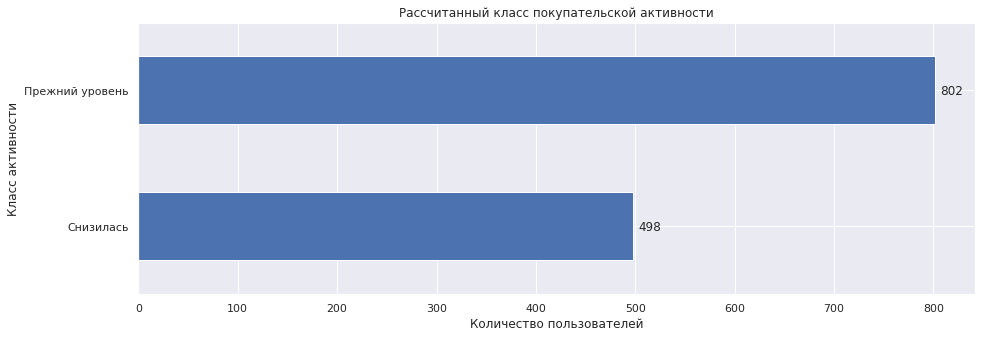

In [53]:
print_barh(df_file['покупательская_активность'])
plt.title('Рассчитанный класс покупательской активности')
plt.xlabel('Количество пользователей')
plt.ylabel('Класс активности')
plt.show()

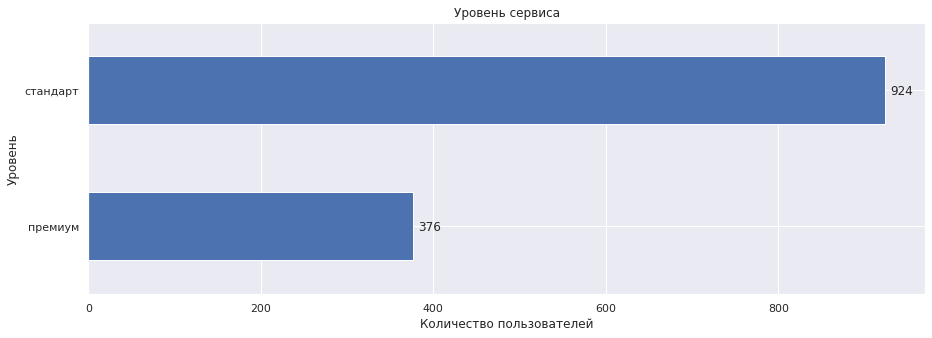

In [54]:
print_barh(df_file['тип_сервиса'])
plt.title('Уровень сервиса')
plt.xlabel('Количество пользователей')
plt.ylabel('Уровень')
plt.show()

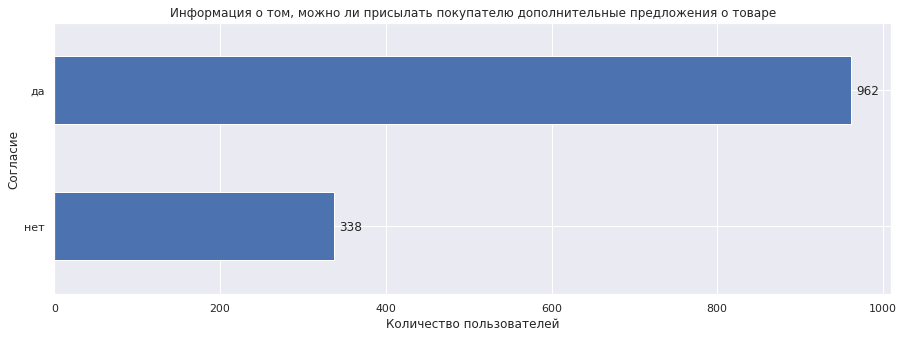

In [55]:
print_barh(df_file['разрешить_сообщать'])
plt.title('Информация о том, можно ли присылать покупателю дополнительные предложения о товаре')
plt.xlabel('Количество пользователей')
plt.ylabel('Согласие')
plt.show()

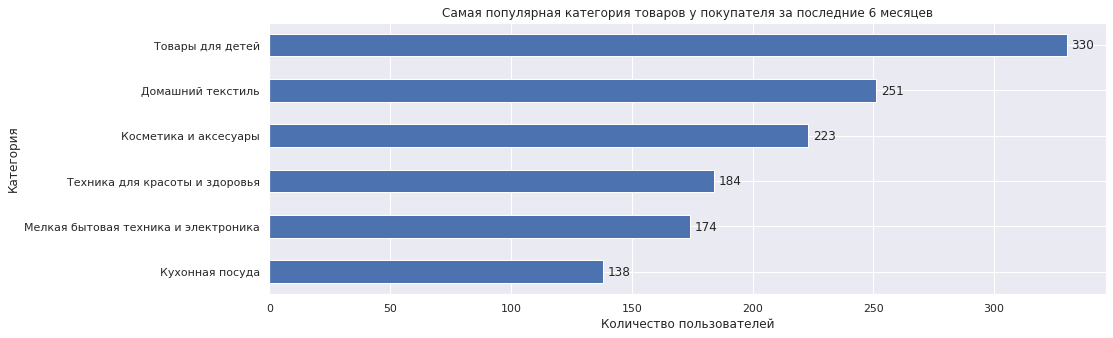

In [56]:
print_barh(df_file['популярная_категория'])
plt.title('Самая популярная категория товаров у покупателя за последние 6 месяцев')
plt.xlabel('Количество пользователей')
plt.ylabel('Категория')
plt.show()

Датафрейм `df_money`

In [57]:
df_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [58]:
df_money.query('выручка > 10000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


В столбце выручка есть один выброс в 106862. Удалим его

In [59]:
df_money = df_money.query('выручка <= 10000').reset_index(drop=True)

In [60]:
df_money['выручка'].describe()

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64

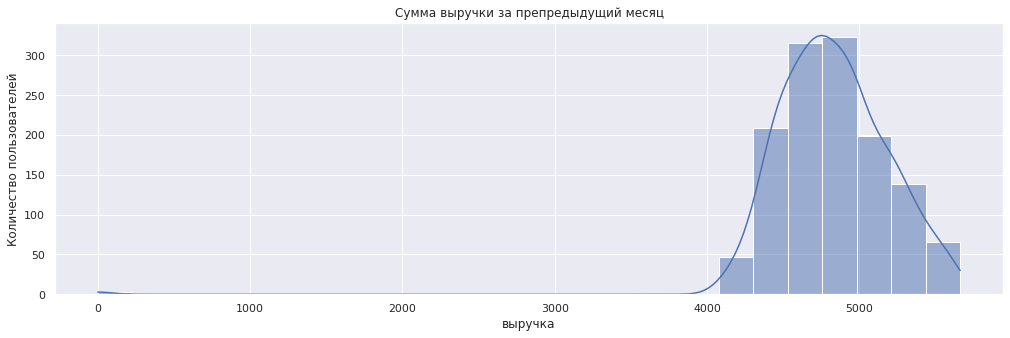

In [61]:
print_hist(df_money.query('период == "препредыдущий_месяц"'), 
           'выручка', 
           None,
           'Сумма выручки за препредыдущий месяц'
          )

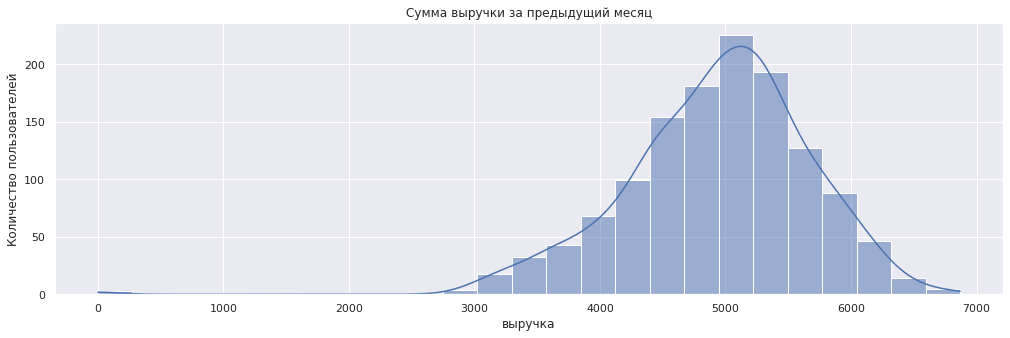

In [62]:
print_hist(df_money.query('период == "предыдущий_месяц"'), 
           'выручка', 
           None,
           'Сумма выручки за предыдущий месяц'
          )

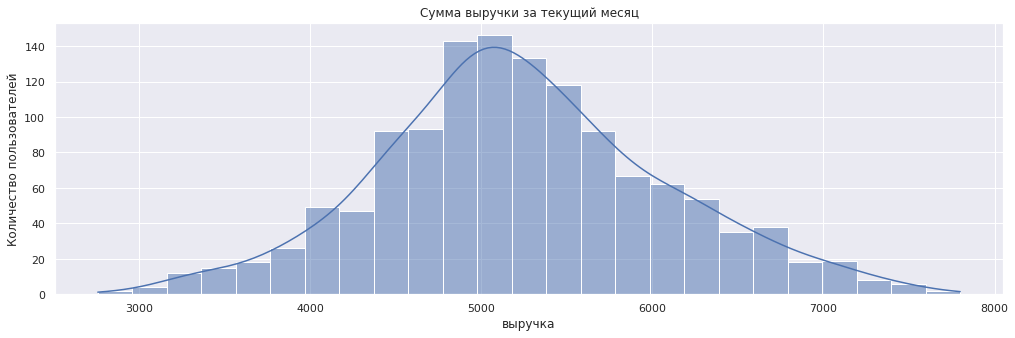

In [63]:
print_hist(df_money.query('период == "текущий_месяц"'), 
           'выручка', 
           None,
           'Сумма выручки за текущий месяц'
          )

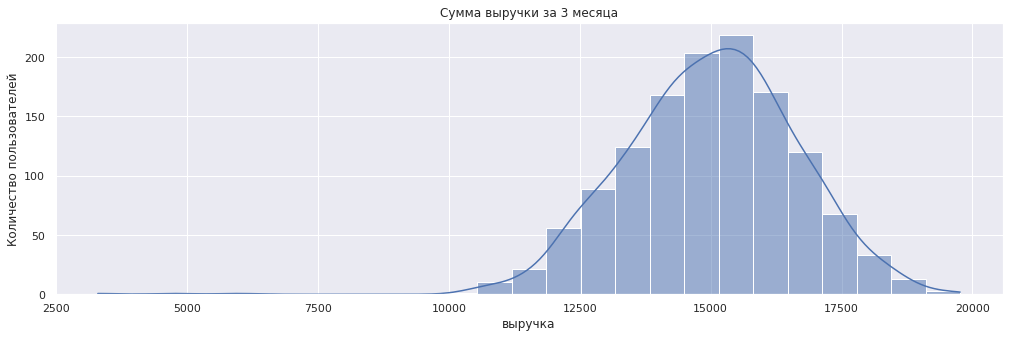

In [64]:
print_hist(df_money.groupby('id').sum(), 
           'выручка',
           None,
           'Сумма выручки за 3 месяца'
          )

Датафрейм `df_time`

In [65]:
df_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

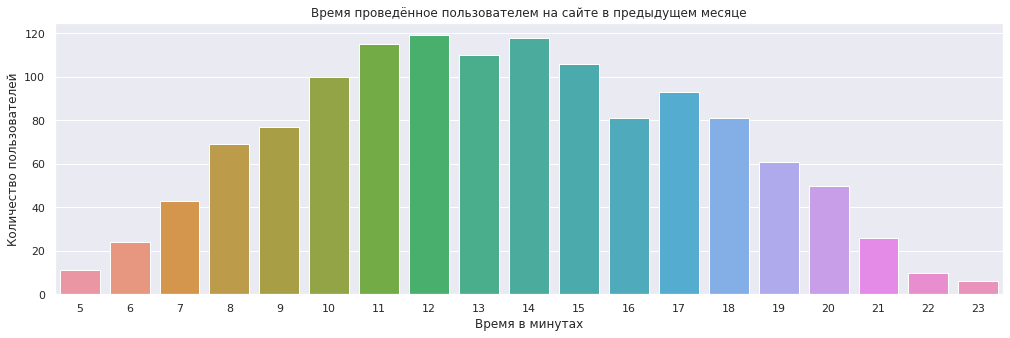

In [66]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_time.query('период == "предыдущий_месяц"'),
              x = 'минут')
plt.title('Время проведённое пользователем на сайте в предыдущем месяце')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.show;

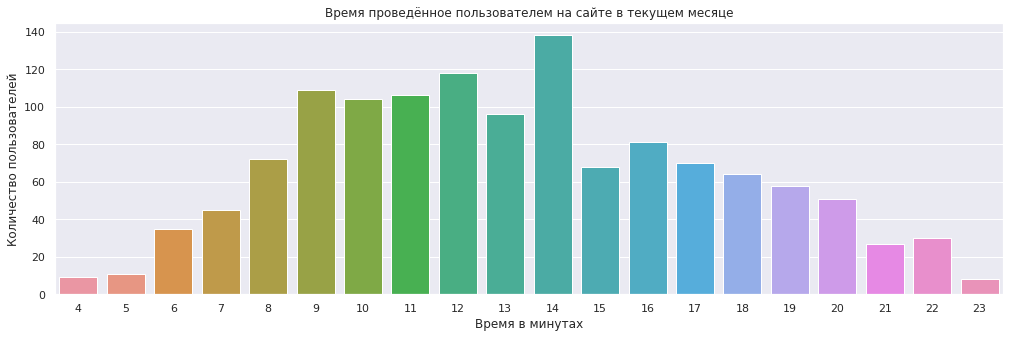

In [67]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_time.query('период == "текущий_месяц"'),
              x = 'минут')
plt.title('Время проведённое пользователем на сайте в текущем месяце')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.show;

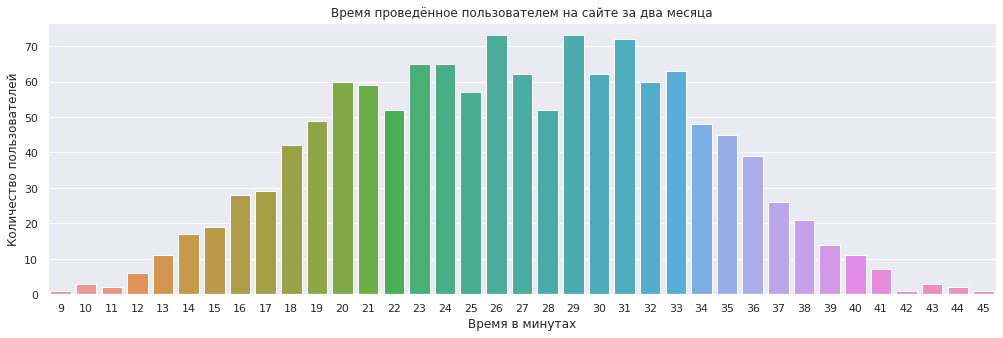

In [68]:
plt.figure(figsize=(17, 5))
sns.countplot(data = df_time.groupby('id').sum(),
              x = 'минут')
plt.title('Время проведённое пользователем на сайте за два месяца')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.show;

Датафрейм `df_profit`

In [69]:
df_profit['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

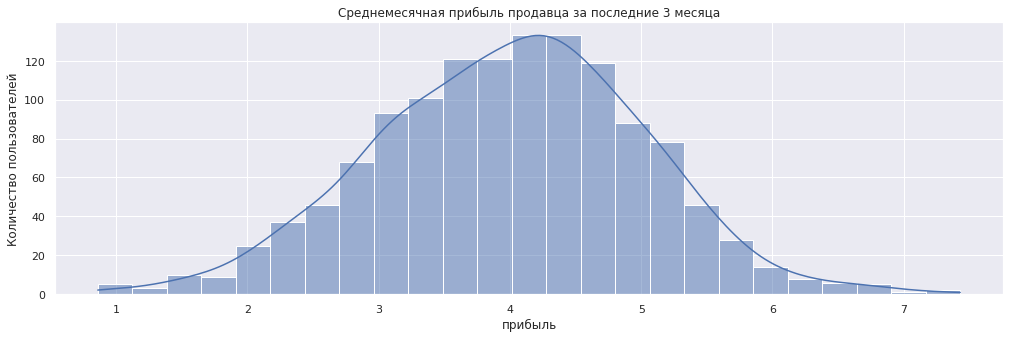

In [70]:
print_hist(df_profit, 
           'прибыль',
           None,
           'Среднемесячная прибыль продавца за последние 3 месяца'
          )

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

In [71]:
# посмотрим на данные пользователей, которые не совершали покупок
df_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [72]:
# удалим этих пользователей
df_money = df_money.groupby('id').filter(lambda x: (x['период'].nunique() == 3) & (x['выручка'].min() > 0))

In [73]:
df_money.head()

,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


**Вывод:**

Датафрейм `df_file`. В основном 4 маркетинговых коммуникаций компания провела с покупателем как за последние 6 иесяцев так и в текущем месяце. В основном покупатели зарегистрированны на сайте от 1 года до 3 лет. Доля акционных товаров в основном составляет от 10 до 40 процентов, но есть часть покупателей которые приобретают только акционный товар. Количество категорий за визит состовляет от 2 до 5. Обычно в корзине покупателя находится от 1 до 5 товаров. Число сбоев обычно равно 4. Количество просматриваемых страниц за последние 3 месяца от 3 до 14. В соновном покупатели выбирают стандартный уровень сервиса и не против дополнительных предложений о товаре. Самые популярные категории это товары для детей и домашний текстиль.

Датафрейме `df_money`. Был удален один выброс. Сумма выручки растет с каждым месяцем и в среднем составляет примерно 15 000 за 3 месяца.

Датафрейме `df_time`. В среднем за 2 месяца покупатель проводит на сайте от 20 до 35 минут.

Датафрейме `df_profit`. Среднемесячная прибыль продавца за последние 3 месяца состовляет от 2 до 5.

Клиенты из датафрейма `df_money`, которые не покупали в один из трех месяцев, были удалены.

## Объединение таблиц

In [74]:
#  сделаем отдельный столбец для каждого периода в датафрейме df_money
df_money['выручка_препредыдущий_месяц'] = df_money.query('период == "препредыдущий_месяц"')['выручка']
df_money['выручка_предыдущий_месяц'] = df_money.query('период == "предыдущий_месяц"')['выручка']
df_money['выручка_текущий_месяц'] = df_money.query('период == "текущий_месяц"')['выручка']

In [75]:
df_money.drop(['период','выручка'], axis=1)

,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
3,215349,4472.0,NaN,NaN
4,215349,NaN,NaN,4971.6
5,215349,NaN,5216.0,NaN
6,215350,4826.0,NaN,NaN
7,215350,NaN,NaN,5058.4
...,...,...,...,...
3894,216646,4725.0,NaN,NaN
3895,216646,NaN,4923.0,NaN
3896,216647,NaN,4720.0,NaN
3897,216647,5183.0,NaN,NaN


In [76]:
df_money = df_money.groupby('id')[
    ['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
].sum().reset_index()

In [77]:
df_money.head()

,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
0,215349,4472.0,5216.0,4971.6
1,215350,4826.0,5457.5,5058.4
2,215351,4793.0,6158.0,6610.4
3,215352,4594.0,5807.5,5872.5
4,215353,5124.0,4738.5,5388.5


In [78]:
#  сделаем отдельный столбец для каждого периода в датафрейме df_time
df_time['период_предыдущий_месяц'] = df_time.query('период == "предыдущий_месяц"')['минут']
df_time['период_текущий_месяц'] = df_time.query('период == "текущий_месяц"')['минут']

In [79]:
df_time.drop(['период','минут'], axis=1)

,id,период_предыдущий_месяц,период_текущий_месяц
0,215348,NaN,14.0
1,215348,13.0,NaN
2,215349,NaN,10.0
3,215349,12.0,NaN
4,215350,NaN,13.0
...,...,...,...
2595,216645,NaN,18.0
2596,216646,18.0,NaN
2597,216646,NaN,7.0
2598,216647,NaN,10.0


In [80]:
df_time = df_time.groupby('id')[
    [ 'период_предыдущий_месяц', 'период_текущий_месяц']
].sum().astype('int').reset_index()

In [81]:
df_time.head()

,id,период_предыдущий_месяц,период_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [82]:
# Объеденим датпфреймы df_file, df_money и df_time по столбцу id
data = df_money.merge(
    df_file,
    on='id',
    how='inner').merge(
    df_time,
    on='id',
    how='inner').reset_index(drop=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_препредыдущий_месяц          1296 non-null   float64
 2   выручка_предыдущий_месяц             1296 non-null   float64
 3   выручка_текущий_месяц                1296 non-null   float64
 4   покупательская_активность            1296 non-null   object 
 5   тип_сервиса                          1296 non-null   object 
 6   разрешить_сообщать                   1296 non-null   object 
 7   маркет_актив_6_мес                   1296 non-null   float64
 8   маркет_актив_тек_мес                 1296 non-null   int64  
 9   длительность                         1296 non-null   int64  
 10  акционные_покупки                    1296 non-null   float64
 11  популярная_категория          

In [83]:
data.head()

,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,период_предыдущий_месяц,период_текущий_месяц
0,215349,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10
1,215350,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13
2,215351,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13
3,215352,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11
4,215353,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10


**Вывод** Объединили таблицы `market_file.csv`, `market_money.csv`, `market_time.csv` с учетом периодов

## Корреляционный анализ

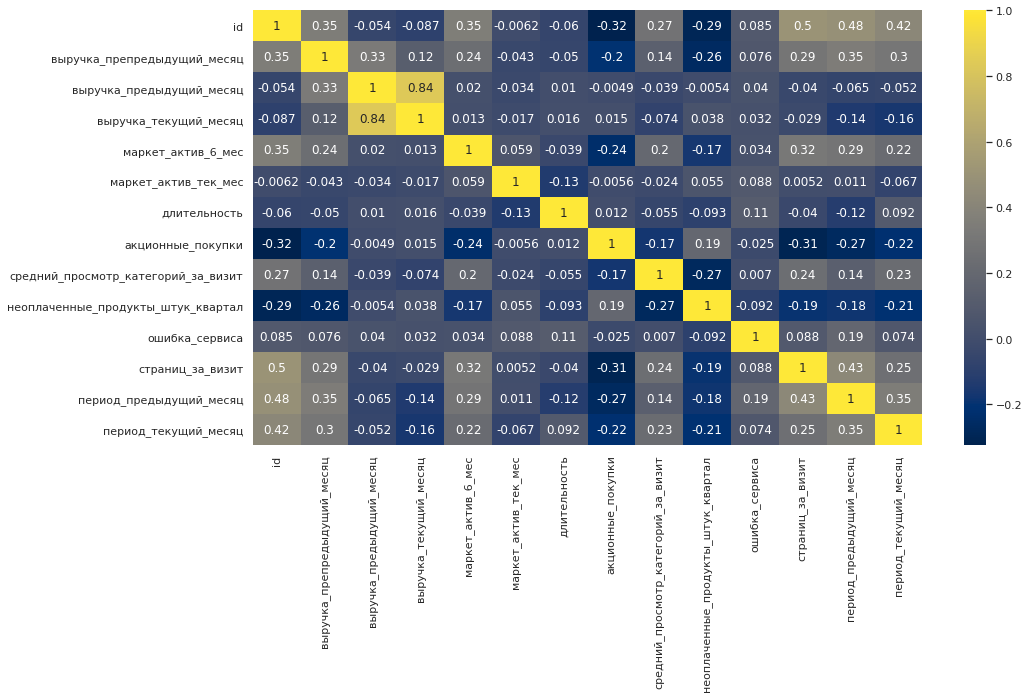

In [84]:
# Коэффициенты корреляции Пирсона
sns.set(rc={"figure.figsize": (15, 8)})
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='cividis'
); 


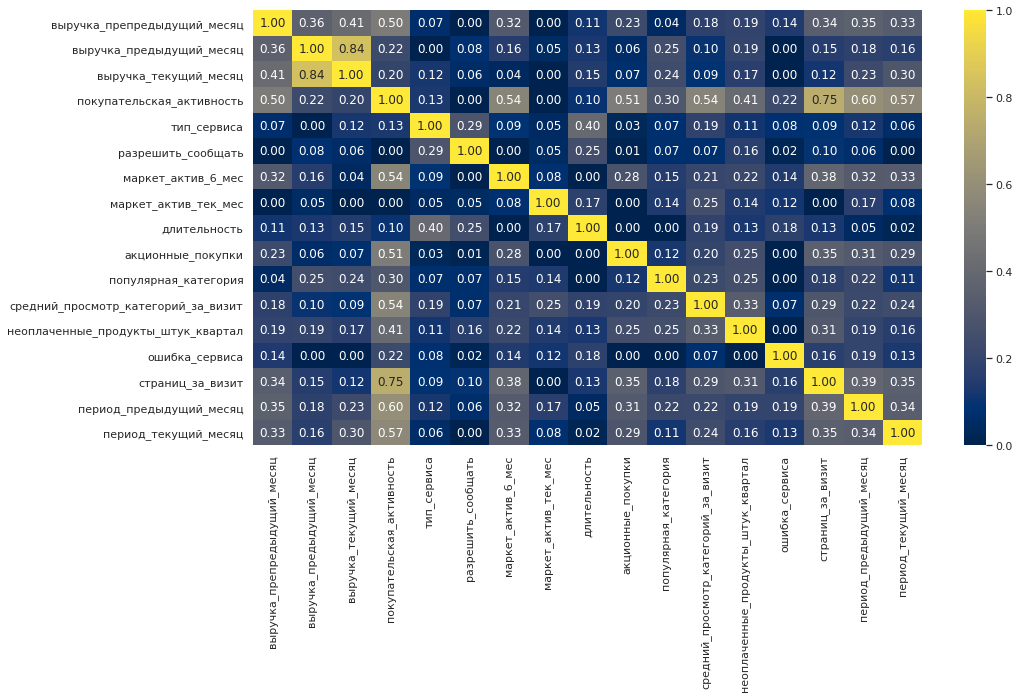

In [85]:
# Коэффициенты корреляции Фи
interval_cols = ['маркет_актив_6_мес', 
                 'длительность', 
                 'акционные_покупки', 
                 'выручка_препредыдущий_месяц', 
                 'выручка_предыдущий_месяц', 
                 'выручка_текущий_месяц']
sns.heatmap(
    data.set_index('id').phik_matrix(verbose=False, interval_cols=interval_cols),
    annot=True,
    fmt='.2f',
    cmap='cividis'
);

**Вывод:**

Есть высокая зависимость между покупательской активностью и количеством страниц за визит, коэффициент Фи равен 0,75;

Есть средняя зависимость между покупательской активностью и количеством времени проведеного на сайте в предыдущем месяце и текущем месяце, коэффициент Фи равен 0,57-0,6;

Мультиколлинеарность не наблюдается.

## Использование пайплайнов

In [86]:
# Зададим id покупателей в индексы датафрейма
data = data.set_index('id')

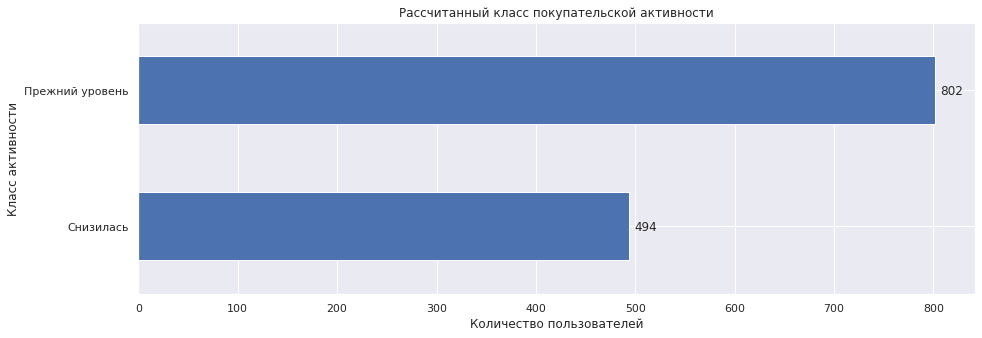

In [87]:
# Выведем значения целевой переменной
print_barh(data['покупательская_активность'])
plt.title('Рассчитанный класс покупательской активности')
plt.xlabel('Количество пользователей')
plt.ylabel('Класс активности')
plt.show()

Покупателей с прежним уровнем практически в 2 раза больше чем покупателей у которых класс активности снизился.

Покупателей с прежним уровнем мажорный класс, а покупатели у которых класс активности снизился минорный класс.

Необходимо примениить стратификацию.

In [88]:
# Выведем информацию о наличии пропусков
data.isna().sum()

выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
период_предыдущий_месяц                0
период_текущий_месяц                   0
dtype: int64

In [89]:
# Задаем константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [90]:
# Отделяем целевые и входные признаки
X = data.drop(columns='покупательская_активность')
y = data['покупательская_активность']
X.shape

(1296, 16)

In [91]:
# Тестовые данные оставляем на потом
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
) 

In [92]:
# Выберем данные которые требуют масштабирования
num_col_names = X_train.select_dtypes(include='number').columns.tolist()
# перечислим методы для масштабирования
num_col = [StandardScaler(), MinMaxScaler(), 'passthrough']

In [93]:
# Выберем данные которые требуют кодирования
ohe_col_names = ['популярная_категория']
ord_col_names = ['тип_сервиса', 'разрешить_сообщать']

In [94]:
# Создадим пайплайн для кодирования
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

In [95]:
# Создадим пайплайн для порядкового кодирования
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [96]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col_names),
        ('ord', ord_pipe, ord_col_names),
        ('num', MinMaxScaler(), num_col_names)
    ], 
    remainder='passthrough'
) 

In [97]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

In [98]:
param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth' : range(2, 8),
        'models__max_features' : range(2, 8),
        'preprocessor__num': num_col  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors' : range(2, 8),
        'preprocessor__num': num_col   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='elasticnet'
        )],
        'models__C': range(1, 5),
        'models__l1_ratio': np.arange(0, 1.1, 0.2),
        'preprocessor__num': num_col
    },
    
    # словарь для модели SVM()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability=True
        )],
        'models__kernel' : ['rbf', 'linear'],
        'preprocessor__num': num_col
    }
]

In [99]:
# Поиск гиперпараметров
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=100
)
randomized_search.fit(X_train, y_train) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means 

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_b...
                                                                       random_state=42,
                                                                       solver='saga')],
                                         'models__C': range(1, 5),
                                         'models__l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['rbf', 'linear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [100]:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_) 
print('Параметры лучшей модели:\n', randomized_search.best_estimator_) 

Метрика ROC-AUC для лучшей модели:
 0.908313104013104
Параметры лучшей модели:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline

In [101]:
result = pd.DataFrame(randomized_search.cv_results_)
result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head()

,rank_test_score,param_models,mean_test_score,params
96,1,"SVC(probability=True, random_state=42)",0.908313,"{'preprocessor__num': StandardScaler(), 'model..."
41,2,"SVC(probability=True, random_state=42)",0.901496,"{'preprocessor__num': MinMaxScaler(), 'models_..."
24,3,"LogisticRegression(penalty='elasticnet', rando...",0.898229,"{'preprocessor__num': MinMaxScaler(), 'models_..."
70,4,"LogisticRegression(penalty='elasticnet', rando...",0.897943,"{'preprocessor__num': MinMaxScaler(), 'models_..."
78,5,"LogisticRegression(penalty='elasticnet', rando...",0.897696,"{'preprocessor__num': MinMaxScaler(), 'models_..."


In [102]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.91


In [103]:
pd.set_option('display.max_colwidth', None)
result[['rank_test_score','params']].sort_values('rank_test_score').head()

,rank_test_score,params
96,1,"{'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models': SVC(probability=True, random_state=42)}"
41,2,"{'preprocessor__num': MinMaxScaler(), 'models__kernel': 'rbf', 'models': SVC(probability=True, random_state=42)}"
24,3,"{'preprocessor__num': MinMaxScaler(), 'models__l1_ratio': 0.0, 'models__C': 1, 'models': LogisticRegression(penalty='elasticnet', random_state=42, solver='saga')}"
70,4,"{'preprocessor__num': MinMaxScaler(), 'models__l1_ratio': 0.8, 'models__C': 1, 'models': LogisticRegression(penalty='elasticnet', random_state=42, solver='saga')}"
78,5,"{'preprocessor__num': MinMaxScaler(), 'models__l1_ratio': 0.6000000000000001, 'models__C': 1, 'models': LogisticRegression(penalty='elasticnet', random_state=42, solver='saga')}"


Наиболее подходящей метрикой в нашем случае будет roc-auc. Она отражает зависимость TPR и FPR, поэтому она всегда даёт адекватную оценку качества модели. К примеру, f1 покажет низкое качество если хотя бы одна из его составляющих даёт низкую оценку. Для accuracy важно только общее количество правильных ответов, поэтому она не обращает внимания на то, что модель плохо предсказывает принадлежность к минорным классам. Поэтому эту метрику нельзя использовать при дисбалансе.

Проверим лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу.

В качестве константной модели используем `DummyClassifier`

In [104]:
# Создание и обучение модели DummyClassifier 
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

# Предсказание на тестовых данных
dummy_model_preds = dummy_model.predict(X_test)
dummy_model_proba = dummy_model.predict_proba(X_test)

print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, dummy_model_proba[:,1]), 2)}') 

Метрика ROC-AUC на тестовой выборке: 0.5


Результат тестирования выбранной модели на тестовой выборке лучше, чем результат константной модели `DummyClassifier`

**Вывод:** 

Применина стратегия использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт лучшую модель.

Лучшей моделью из перебора оказалсь модель c методом опорных векторов с параметрами:

kernel = rbf - ядро радиальной базисной функции

random_state=42 (просто константа)

roc-auc = 0.91 на тренировочной, валидационной и тестовой выборке.

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

In [105]:
best_model = randomized_search.best_estimator_.named_steps['models']

In [106]:
preprocessor_best = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col_names),
        ('ord', ord_pipe, ord_col_names),
        ('num', StandardScaler(), num_col_names)
    ], 
    remainder='passthrough'
) 

In [107]:
preprocessor_best.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Or...
                                 ['тип_сервиса', 'разрешить_сообщать']),
                                ('num', StandardScaler(),
                                 ['выручка_препредыдущий_месяц',
                                  'выручка_предыдущий_месяц',
                                  'выручка_текущий_месяц', 'маркет_актив_6_мес',
                                  'маркет_актив_тек_мес', 'длительность',
                                  'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит',
                                  'период_предыдущий_месяц',
                                  'период_текущий_месяц'])])

In [108]:
feature_names = preprocessor_best.get_feature_names_out()

In [109]:
X_train_new = preprocessor_best.fit_transform(X_train)
X_test_new = preprocessor_best.transform(X_test)

In [110]:
explainer = shap.Explainer(best_model.predict_proba, X_train_new, feature_names=feature_names)
shap_values = explainer(X_test_new)

PermutationExplainer explainer: 325it [04:19,  1.22it/s]                         


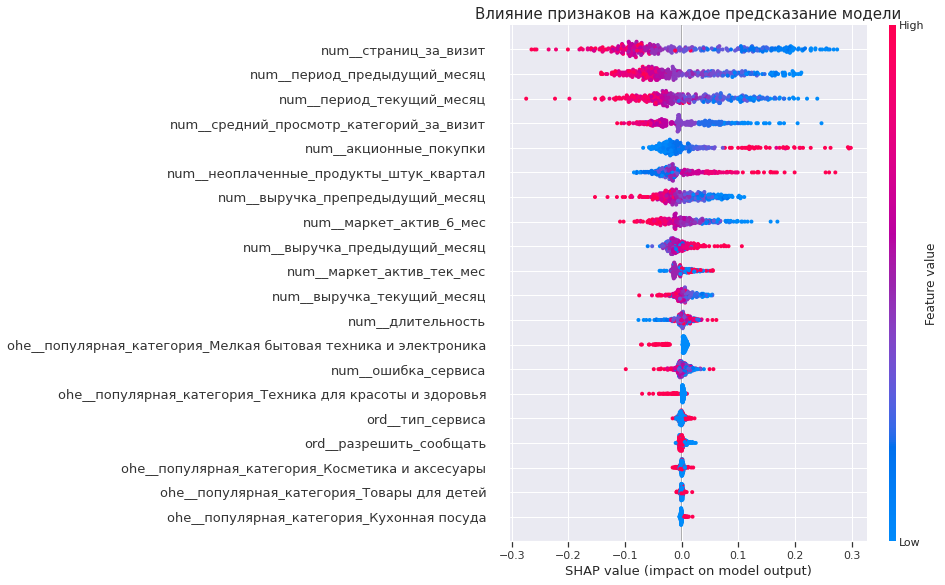

In [111]:
plt.title('Влияние признаков на каждое предсказание модели', size=15)
shap.plots.beeswarm(shap_values[:,:,1], max_display=20)

Данный график отражает общую важность признаков модели по значениям Шепли, присвоенным всем наблюдениям в выборке.

По данному графику негативные значения Шепли слева от центральной вертикальной линии означают, что признак склоняет модель отнести объекты к классу 0, а положительные справа — к классу 1.

Чем толще линия по вертикали, тем больше наблюдений сгруппированы вместе: у них близкие значения Шепли. Это значит, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных.

Цвет точки отражает значения каждого признака объекта: чем краснее объект, тем значение признака выше

Наибольшую значимость несут признаки расположенные ближе к концу оси X. (кол-во страниц за визит, доля акционных покупок,  проведенное в предыдущем месяце время, проведенное в текущем месяце время, неоплаченые продукты за квартал в корзине)

Наименьшую значимость несут признаки, расположенные ближе к началу оси X. (категория техника для красоты и здоровья, категори мелкая бытовая техника и электроникаб тип сервиса, категория косметика и аксессуары,разрешение сообщать о дополнительных товарах, катеория кухонная посуда)

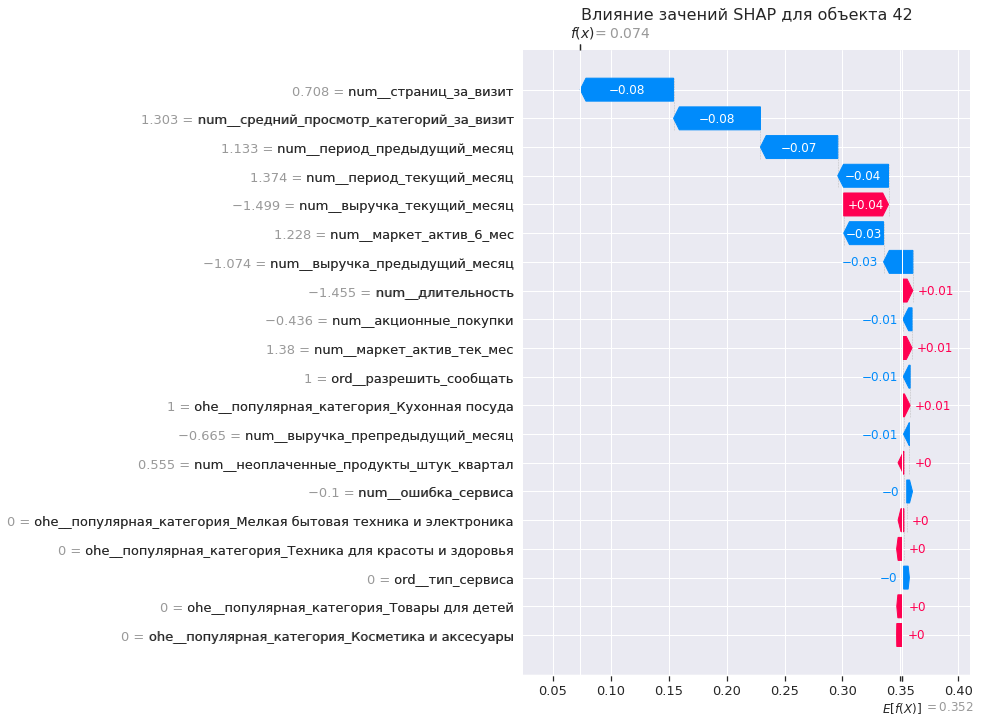

In [112]:
shap.plots.waterfall(shap_values[:,:,1][42], show=False, max_display=20)

# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=14)
ax.set_title('Влияние зачений SHAP для объекта 42', fontsize=16)

plt.show()

Для начала вспомним как верно читать данный график:

- Начальная точка (базовое значение): График начинается с определенной базовой точки, которая соответствует предсказанию модели для некоторых начальных значений признаков, например, средним значениям признаков в тренировочном наборе данных.
- Вклады признаков: Для каждого признака вклад отображается в виде столбика (горизонтального прямоугольника) на графике waterfall. Значение столбика откладывается на вертикальной оси и представляет вклад этого признака в общую предсказанную величину. Столбики могут быть положительными (синего цвета) или отрицательными (красного цвета).
- Итоговая предсказанная величина отображается в виде вертикальной линии на графике. Она представляет изменение предсказания модели относительно базовой точки, накопленное влияние всех признаков.
- Направление вклада: Если вклад признака положительный (синий столбик), это значит, что данный признак увеличивает предсказание относительно базовой точки. Если вклад отрицательный (красный столбик), это значит, что данный признак уменьшает предсказание относительно базовой точки.
- Сумма вкладов: Сумма всех вкладов признаков будет равна итоговому изменению предсказания модели относительно базовой точки. Она может быть положительной или отрицательной, что указывает на увеличение или уменьшение предсказанной величины относительно базовой точки.

График waterfall помогает понять, какие признаки и насколько вносят вклад в изменение предсказания модели. Он позволяет проанализировать наиболее важные признаки и понять их положительное или отрицательное влияние на предсказание.

Как мы можем увидеть 5 важнейших признаков это проведенное время за текущий месяц, проведенное время за предыдущий месяц, количество страниц за визит, акционные покупки, количество товаров в корзине

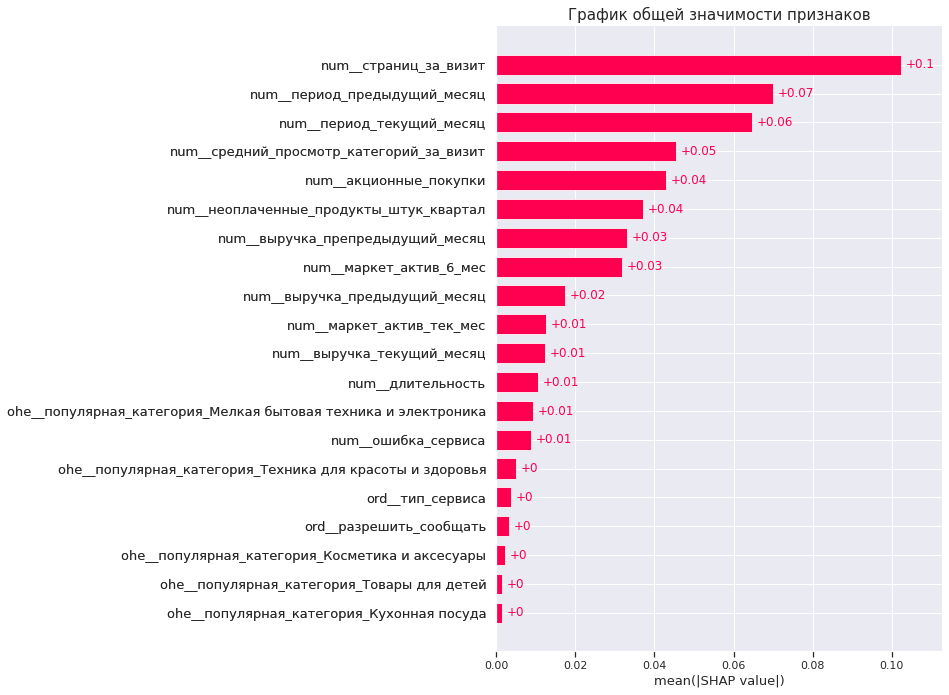

In [113]:
shap.plots.bar(shap_values[:,:,1], max_display=20, show=False)
plt.title('График общей значимости признаков', size=15)
plt.show()

**Вывод:** Для итоговой модели которую мы отобрали наиболее важными признаками является:

- кол-во страниц за визит;
- среднее кол-во просмотренных категорий за визит;
- проведенное в предыдущем месяце время;
- проведенное в текущем месяце время;
- доля акционных покупок.

Признаки которые вообще не используются для построения модели:
- категория товары для детей;
- тип сервиса;
- категория косметика и аксессуары;
- разрешение сообщать о дополнительных товарах;
- категория кухонная посуда

Для принятия каких-либо решений от бизнеса стоит обращать внимание на поведение клиента на сайте, стоит увеличивать вовлеченность клиентов: как долго они проводят время на сайте; удобный ли сайт для покупателя. Проведение разнообразных акций. Сделать напоминание что в корзине остались неоплаченные заказы.

## Сегментация покупателей

### Выполним сегментацию покупателей используя результаты моделирования и данные о прибыльности покупателей

In [114]:
# Применим обученную модель к датасету data
y_svc_pred = randomized_search.predict(X)
y_svc_proba = randomized_search.predict_proba(X)

In [115]:
# Добавим новый стобец с предсказанием и вероятностью 
data['предсказание'] = y_svc_pred
data['вероятность'] = y_svc_proba[:,1]

In [116]:
data.head()

,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,период_предыдущий_месяц,период_текущий_месяц,предсказание,вероятность
id,,,,,,,,,,,,,,,,,,,
215349,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,Снизилась,0.979680
215350,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,Прежний уровень,0.548046
215351,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,Снизилась,0.819377
215352,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,Снизилась,0.949660
215353,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,Снизилась,0.808037


In [117]:
# Объеденим 2 таблицы
data = data.merge(df_profit, on='id', how='inner')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_препредыдущий_месяц          1296 non-null   float64
 2   выручка_предыдущий_месяц             1296 non-null   float64
 3   выручка_текущий_месяц                1296 non-null   float64
 4   покупательская_активность            1296 non-null   object 
 5   тип_сервиса                          1296 non-null   object 
 6   разрешить_сообщать                   1296 non-null   object 
 7   маркет_актив_6_мес                   1296 non-null   float64
 8   маркет_актив_тек_мес                 1296 non-null   int64  
 9   длительность                         1296 non-null   int64  
 10  акционные_покупки                    1296 non-null   float64
 11  популярная_категория          

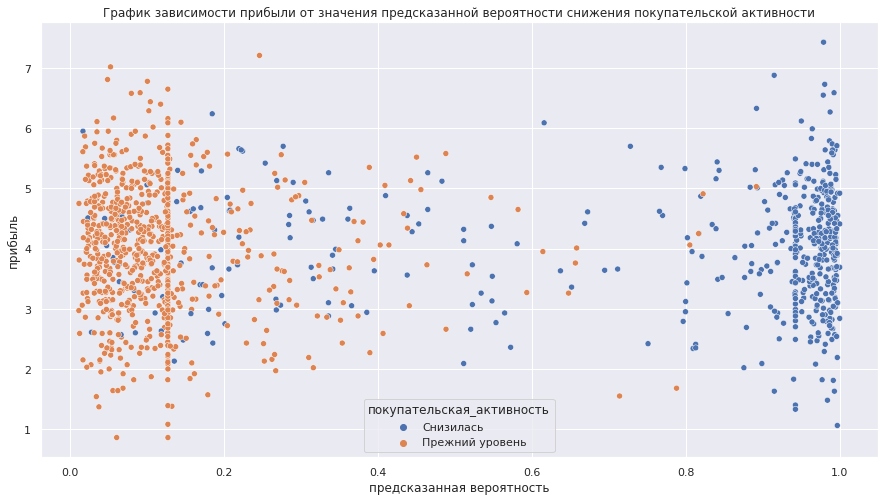

In [119]:
# Выводим диаграмму рассеяния по прибыли и вероятности понижения активности выданной моделью
fig, axes = plt.subplots()

sns.scatterplot(data=data,
                x='вероятность',
                y='прибыль',
                ax=axes,
                hue='покупательская_активность',
                color='red')
                #label='Значение вероятности снижения покупательской активности')
plt.xlabel('предсказанная вероятность')
plt.title('График зависимости прибыли от значения предсказанной вероятности снижения покупательской активности')
plt.show() 

Выделим 4 сегмента покупателей:

- Клиенты, с низкой вероятностью снижения активности и низкой прибылью;
- Клиенты, с низкой вероятностью снижения активности и высокой прибылью;
- Клиенты, с высокой вероятностью снижения активности и низкой прибылью;
- Клиенты, с высокой вероятностью снижения активности и высокой прибылью.

Низкой вероятностью будем считать показатель < 0.6;

Низкой прибылью будем считать показатель < 4.

### Выберем группу покупателей и проанализируем как увеличить её покупательскую активность

Самый важный сегмент из выделенных групп на мой взгляд это 4 группа: клиенты с высокой вероятностью снижения и высокой прибылью. Эту группу и будем исследовать

In [120]:
# Создадим выборку этого сегмента
profit_predict_high = data.query('вероятность >= 0.6 & прибыль >= 4')
profit_predict_high.head()

,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,...,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,период_предыдущий_месяц,период_текущий_месяц,предсказание,вероятность,прибыль
0,215349,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,...,Товары для детей,4,4,2,5,12,10,Снизилась,0.979680,4.16
2,215351,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,...,Товары для детей,5,0,6,4,11,13,Снизилась,0.819377,4.87
3,215352,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,...,Товары для детей,3,2,3,2,8,11,Снизилась,0.949660,4.21
7,215356,4433.0,4146.5,4566.4,Снизилась,стандарт,да,4.2,4,192,...,Косметика и аксесуары,2,2,1,3,6,7,Снизилась,0.979193,4.93
9,215360,5555.0,5304.5,5834.9,Снизилась,премиум,да,3.9,3,623,...,Кухонная посуда,3,1,4,7,9,6,Снизилась,0.769755,4.55


Выберем группы признаков для анализа выбранного сегмента

In [121]:
group = [
    'страниц_за_визит', 
    'период_предыдущий_месяц', 
    'период_текущий_месяц', 
    'средний_просмотр_категорий_за_визит', 
    'неоплаченные_продукты_штук_квартал'
]

In [122]:
# Посмотрим на метрики этих выборок
profit_predict_high[group].describe()

,страниц_за_визит,период_предыдущий_месяц,период_текущий_месяц,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал
count,212.000000,212.000000,212.000000,212.000000,212.000000
mean,4.358491,9.882075,10.084906,2.424528,4.014151
std,2.237927,2.527622,2.616455,1.122355,2.238142
min,1.000000,5.000000,4.000000,1.000000,0.000000
25%,3.000000,8.000000,8.000000,2.000000,2.000000
50%,4.000000,10.000000,10.000000,2.000000,4.000000
75%,6.000000,11.000000,12.000000,3.000000,5.000000
max,14.000000,18.000000,20.000000,6.000000,10.000000


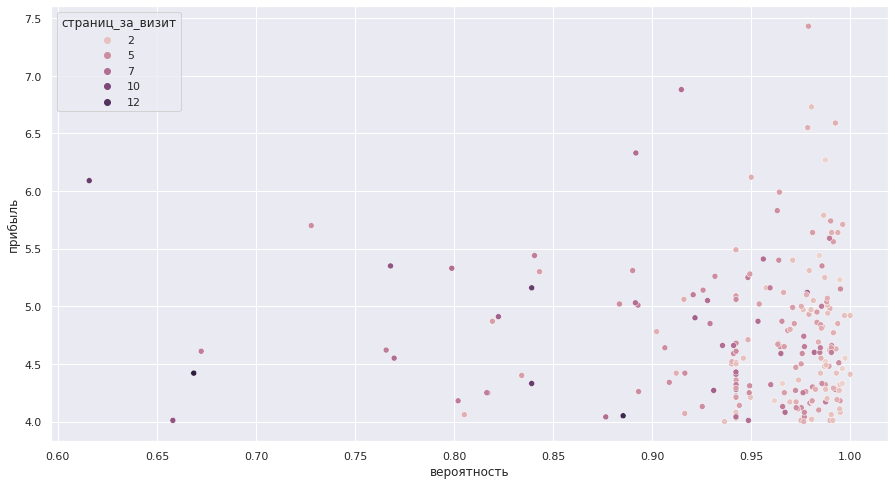

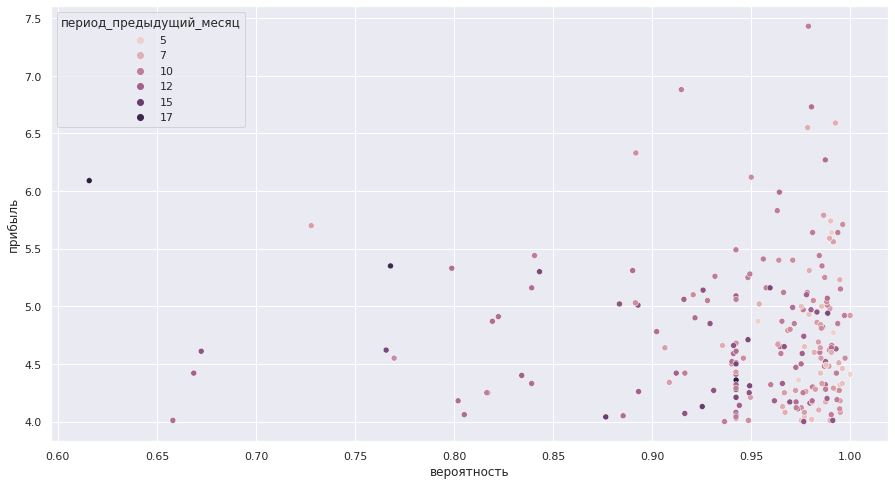

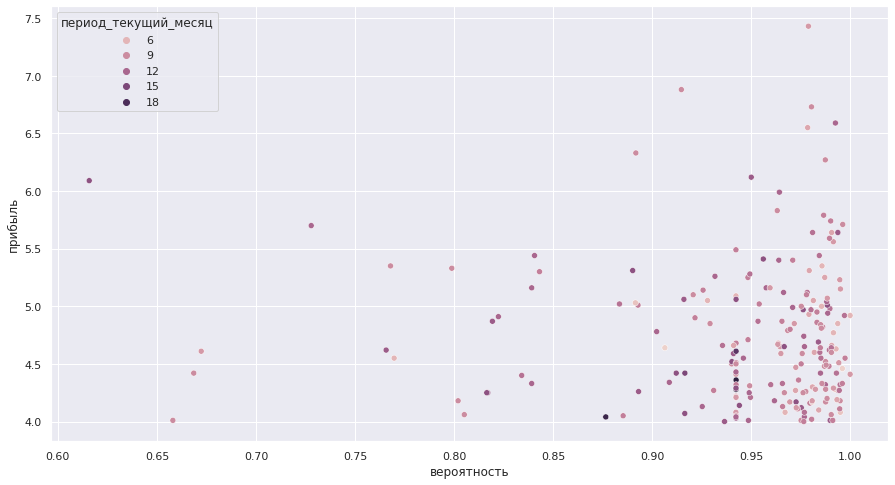

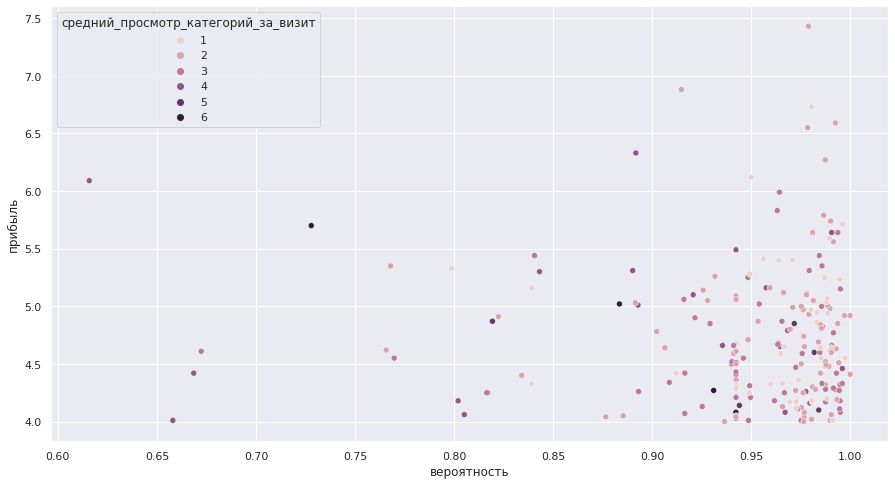

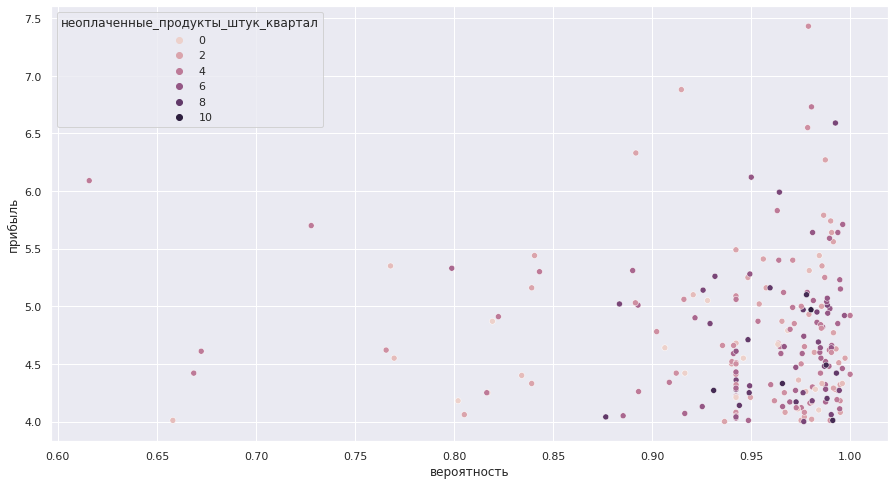

In [123]:
# Визуализируем сегмент по признакам
for i in range(len(group)):
    sns.scatterplot(
        data=profit_predict_high,
        x='вероятность',
        y='прибыль',
        hue=group[i])
    plt.show();


На все выбранные признаки мы можем повлиять. Попробуем изменить признаки в большую и в меньшую сторону и посмотрим как изменятся предсказания

In [124]:
# Создадим новую оценку предсказаний модели
def pred_scorer (data):
    present = data.query('покупательская_активность == "Снизилась"')['покупательская_активность'].count() / data['покупательская_активность'].count()
    new_pred = data.query('предсказание == "Снизилась"')['предсказание'].count() / data['предсказание'].count()
    corer = present/new_pred
    return present, new_pred, corer

In [125]:
# Посчитаем что будет со снижение активности при увеличении каждого из признаков в сегменте
for row in group:
    elem = pd.DataFrame((profit_predict_high[row]+1)*2)
    profit_predict_high_x2 = profit_predict_high.drop(['предсказание', 'вероятность', 'прибыль'], axis=1).drop(row,axis=1).join(elem)
    y_pred_x2 = randomized_search.predict(profit_predict_high_x2)
    profit_predict_high_x2['предсказание'] = y_pred_x2
    present, new_pred, corer = pred_scorer(profit_predict_high_x2)
    print(f"Увеличение значений для столбца: {profit_predict_high[row].name}")
    print(f"Начальный процент снижения активности: {present:.2%}")
    print(f"Полученный процент снижения активности: {new_pred:.2%}")
    if corer > 1:
        print(f"Вывод: уменьшение процента снижения активности на {corer-1:.2%}\n")
    else:
        print(f"Вывод: увеличение процента снижения активности на {1-corer:.2%}\n")

Увеличение значений для столбца: страниц_за_визит
Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 75.47%
Вывод: уменьшение процента снижения активности на 29.37%

Увеличение значений для столбца: период_предыдущий_месяц
Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 53.30%
Вывод: уменьшение процента снижения активности на 83.19%

Увеличение значений для столбца: период_текущий_месяц
Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 63.21%
Вывод: уменьшение процента снижения активности на 54.48%

Увеличение значений для столбца: средний_просмотр_категорий_за_визит
Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 89.62%
Вывод: уменьшение процента снижения активности на 8.95%

Увеличение значений для столбца: неоплаченные_продукты_штук_квартал
Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 100.00%
Вывод

In [126]:
# Посчитаем что будет со снижением активности в сегменте при увеличении всех признаков
group_x2 = pd.DataFrame()
for i in range(len(group)):
    elem = pd.DataFrame((profit_predict_high[group[i]]+1)*2)
    group_x2 = pd.concat([group_x2, elem], axis=1)

In [127]:
profit_predict_high_x2 = profit_predict_high.drop(['предсказание', 'вероятность', 'прибыль'], axis=1).drop(group, axis=1).join(group_x2)
y_pred_x2 = randomized_search.predict(profit_predict_high_x2)
profit_predict_high_x2['предсказание'] = y_pred_x2

In [128]:
present, new_pred, corer = pred_scorer(profit_predict_high_x2)
print(f"Начальный процент снижения активности: {present:.2%}")
print(f"Полученный процент снижения активности: {new_pred:.2%}")
if corer > 1:
    print(f"Вывод: уменьшение процента снижения активности на {corer-1:.2%}\n")
else:
    print(f"Вывод: увеличение процента снижения активности: {1-corer:.2%}\n")

Начальный процент снижения активности: 97.64%
Полученный процент снижения активности: 38.68%
Вывод: уменьшение процента снижения активности на 152.44%



### Сделайте выводы о сегментах:
- какой сегмент вы взяли для дополнительного исследования,
- какие предложения вы сделали и почему.

**Вывод:** 

Самый важный сегмент из выделенных групп на мой взгляд это 4 группа: клиенты с высокой вероятностью снижения и высокой прибылью. Этот сигмент наиболее важен для нас так как эти покупатели приносят большую прибыль и если у них снизится покупательская способность, то сильно просядет прибыль магазина.

Для анализа были взяты признаки 'страниц_за_визит', 'период_предыдущий_месяц', 'период_текущий_месяц', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал' так как они больше всего влияют на предсказания моделей и мы можем на них как то повлиять.

В результате увеличения значений признаков в 2 раза получили:

- Для столбца `страниц_за_визит` будет **уменьшение** процента снижения активности на 30.00%;
- Для столбца `период_предыдущий_месяц` будет **уменьшение** процента снижения активности на 45.45%;
- Для столбца `период_текущий_месяц` будет **уменьшение** процента снижения активности на 46.48%;
- Для столбца `средний_просмотр_категорий_за_визит` будет **уменьшение** процента снижения активности на 5.05%;
- Для столбца `неоплаченные_продукты_штук_квартал` будет **увеличение** процента снижения активности на 4.15%;
- Для всех столбцов будет **уменьшение** процента снижения активности на 101.94%.

Необходимо увеличить время пребывания и взаимодействие покупателя с сайтом, чтобы уменьшить отток покупателей. Необходимо провести опрос покупателей, что они хотели бы изменить на сайте и доработать интерфейс сайта для их удобства. И делать это регулярно.

Необходимо уменьшить содержание корзины покупателя. Возможно нужны какие то дополнительные рассылки покупателям о неоформленных покупках.

## Общий вывод

В ходе работы нужно было разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Был промаркирован уровень финансовой активности постоянных покупателей на два уровня активности:

«снизилась», если клиент стал покупать меньше товаров;

«прежний уровень».

Была построить модель, которая предсказывает вероятность снижения покупательской активности клиента в следующие три месяца.

Используя данные модели и данные о прибыльности клиентов, выделен сегмент покупателей и разработаны мероприятия для снижения оттока покупателей с сайта

- Загрузка данных

В первом и четвертом датафрейме 1300, во втором 3900, в третьем 2600 записей.

В датафрейме `df_file` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_money` формат столбцов верный. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_time` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

В датафрейме `df_profit` формат столбцов верный. Необходимо откорректировать содержание столбцов к единому стилю. Названия столбцов оставим кирилическими, но приведем к единому стилю.

- Предобработка данных

Во всех датафреймах изменили названия столбцов к единому стилю. Пропуски и явные дубликаты отсутствуют.

В датафрейме `df_file` и `df_time` исправили не явные дубликаты.

В датафрейме `df_profit` приведели значения в столбце прибыль к единому стилю и зменили тип данных

- Исследовательский анализ данных

Датафрейм `df_file`. В основном 4 маркетинговых коммуникаций компания провела с покупателем как за последние 6 иесяцев так и в текущем месяце. В основном покупатели зарегистрированны на сайте от 1 года до 3 лет. Доля акционных товаров в основном составляет от 10 до 40 процентов, но есть часть покупателей которые приобретают только акционный товар. Количество категорий за визит состовляет от 2 до 5. Обычно в корзине покупателя находится от 1 до 5 товаров. Число сбоев обычно равно 4. Количество просматриваемых страниц за последние 3 месяца от 3 до 14. В соновном покупатели выбирают стандартный уровень сервиса и не против дополнительных предложений о товаре. Самые популярные категории это товары для детей и домашний текстиль.

Датафрейме `df_money`. Был удален один выброс. Сумма выручки растет с каждым месяцем и в среднем составляет примерно 15 000 за 3 месяца.

Датафрейме `df_time`. В среднем за 2 месяца покупатель проводит на сайте от 20 до 35 минут.

Датафрейме `df_profit`. Среднемесячная прибыль продавца за последние 3 месяца состовляет от 2 до 5.

Клиенты из датафрейма `df_money`, которые не покупали в один из трех месяцев, были удалены.

- Объединение таблиц

Объединили таблицы market_file.csv, market_money.csv, market_time.csv с учетом периодов

- Корреляционный анализ

Есть высокая зависимость между покупательской активностью и количеством страниц за визит, коэффициент Фи равен 0,75;

Есть средняя зависимость между покупательской активностью и количеством времени проведеного на сайте в предыдущем месяце и текущем месяце, коэффициент Фи равен 0,57-0,6;

Мультиколлинеарность не наблюдается.

- Использование пайплайнов

Наиболее подходящей метрикой в нашем случае будет roc-auc. Она отражает зависимость TPR и FPR, поэтому она всегда даёт адекватную оценку качества модели. К примеру, f1 покажет низкое качество если хотя бы одна из его составляющих даёт низкую оценку. Для accuracy важно только общее количество правильных ответов, поэтому она не обращает внимания на то, что модель плохо предсказывает принадлежность к минорным классам. Поэтому эту метрику нельзя использовать при дисбалансе.

Применина стратегия использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт лучшую модель.

Лучшей моделью из перебора оказалсь модель c методом опорных векторов с параметрами:

kernel = rbf - ядро радиальной базисной функции

random_state=42 (просто константа)

roc-auc = 0.91 на тренировочной, валидационной и тестовой выборке.

- Анализ важности признаков

Для итоговой модели которую мы отобрали наиболее важными признаками является:

- кол-во страниц за визит;
- среднее кол-во просмотренных категорий за визит;
- проведенное в предыдущем месяце время;
- проведенное в текущем месяце время;
- доля акционных покупок.

Признаки которые вообще не используются для построения модели:
- категория товары для детей;
- тип сервиса;
- категория косметика и аксессуары;
- разрешение сообщать о дополнительных товарах;
- категория кухонная посуда

Для принятия каких-либо решений от бизнеса стоит обращать внимание на поведение клиента на сайте, стоит увеличивать вовлеченность клиентов: как долго они проводят время на сайте; удобный ли сайт для покупателя. Проведение разнообразных акций. Сделать напоминание что в корзине остались неоплаченные заказы.

- Сегментация покупателей

Выделили 4 сегмента покупателей:

1. Клиенты, с низкой вероятностью снижения активности и низкой прибылью;
2. Клиенты, с низкой вероятностью снижения активности и высокой прибылью;
3. Клиенты, с высокой вероятностью снижения активности и низкой прибылью;
4. Клиенты, с высокой вероятностью снижения активности и высокой прибылью.

Низкой вероятностью считаем показатель < 0.6;

Низкой прибылью считаем показатель < 4.

Самый важный сегмент из выделенных групп на мой взгляд это 4 группа: клиенты с высокой вероятностью снижения и высокой прибылью. Этот сигмент наиболее важен для нас так как эти покупатели приносят большую прибыль и если у них снизится покупательская способность, то сильно просядет прибыль магазина.

Для анализа были взяты признаки `страниц_за_визит`, `период_предыдущий_месяц`, `период_текущий_месяц`, `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал` так как они больше всего влияют на предсказания моделей и мы можем на них как то повлиять.

В результате увеличения значений признаков в 2 раза получили:

- Для столбца `страниц_за_визит` будет **уменьшение** процента снижения активности на 30.00%;
- Для столбца `период_предыдущий_месяц` будет **уменьшение** процента снижения активности на 45.45%;
- Для столбца `период_текущий_месяц` будет **уменьшение** процента снижения активности на 46.48%;
- Для столбца `средний_просмотр_категорий_за_визит` будет **уменьшение** процента снижения активности на 5.05%;
- Для столбца `неоплаченные_продукты_штук_квартал` будет **увеличение** процента снижения активности на 4.15%;
- Для всех столбцов будет **уменьшение** процента снижения активности на 101.94%.

Необходимо увеличить время пребывания и взаимодействие покупателя с сайтом, чтобы уменьшить отток покупателей. Необходимо провести опрос покупателей, что они хотели бы изменить на сайте и доработать интерфейс сайта для их удобства. И делать это регулярно.

Необходимо уменьшить содержание корзины покупателя. Возможно нужны какие то дополнительные рассылки покупателям о неоформленных покупках.